In [30]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from pandas_profiling import ProfileReport
import pickle
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [31]:
data = pd.read_csv('winequality-red.csv', names=['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                                                 'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates',
                                                 'alcohol','quality'])
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [3]:
pf = ProfileReport(data)
pf

Summarize dataset:   0%|          | 0/26 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [32]:
data.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [33]:
set(data.quality)

{3, 4, 5, 6, 7, 8}

In [34]:
x = data.drop(columns='quality')
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [35]:
y = data['quality']
y.head(2)

0    5
1    5
Name: quality, dtype: int64

In [89]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=20)

In [9]:
dt_model = DecisionTreeClassifier()

In [10]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

[Text(475.82327586206895, 1048.3714285714286, 'X[10] <= 9.85\ngini = 0.655\nsamples = 320\nvalue = [5, 10, 132, 125, 46, 2]'),
 Text(198.02586206896552, 970.7142857142858, 'X[9] <= 0.585\ngini = 0.508\nsamples = 127\nvalue = [1, 7, 82, 34, 3, 0]'),
 Text(110.63793103448276, 893.0571428571429, 'X[10] <= 9.075\ngini = 0.379\nsamples = 61\nvalue = [0, 6, 47, 8, 0, 0]'),
 Text(70.55172413793103, 815.4000000000001, 'X[9] <= 0.525\ngini = 0.5\nsamples = 4\nvalue = [0, 2, 0, 2, 0, 0]'),
 Text(57.724137931034484, 737.7428571428572, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]'),
 Text(83.37931034482759, 737.7428571428572, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0, 0]'),
 Text(150.72413793103448, 815.4000000000001, 'X[1] <= 0.825\ngini = 0.304\nsamples = 57\nvalue = [0, 4, 47, 6, 0, 0]'),
 Text(109.03448275862068, 737.7428571428572, 'X[10] <= 9.65\ngini = 0.237\nsamples = 52\nvalue = [0, 1, 45, 6, 0, 0]'),
 Text(64.13793103448276, 660.0857142857144, 'X[3] <= 4.8\ngini = 0.138\nsa

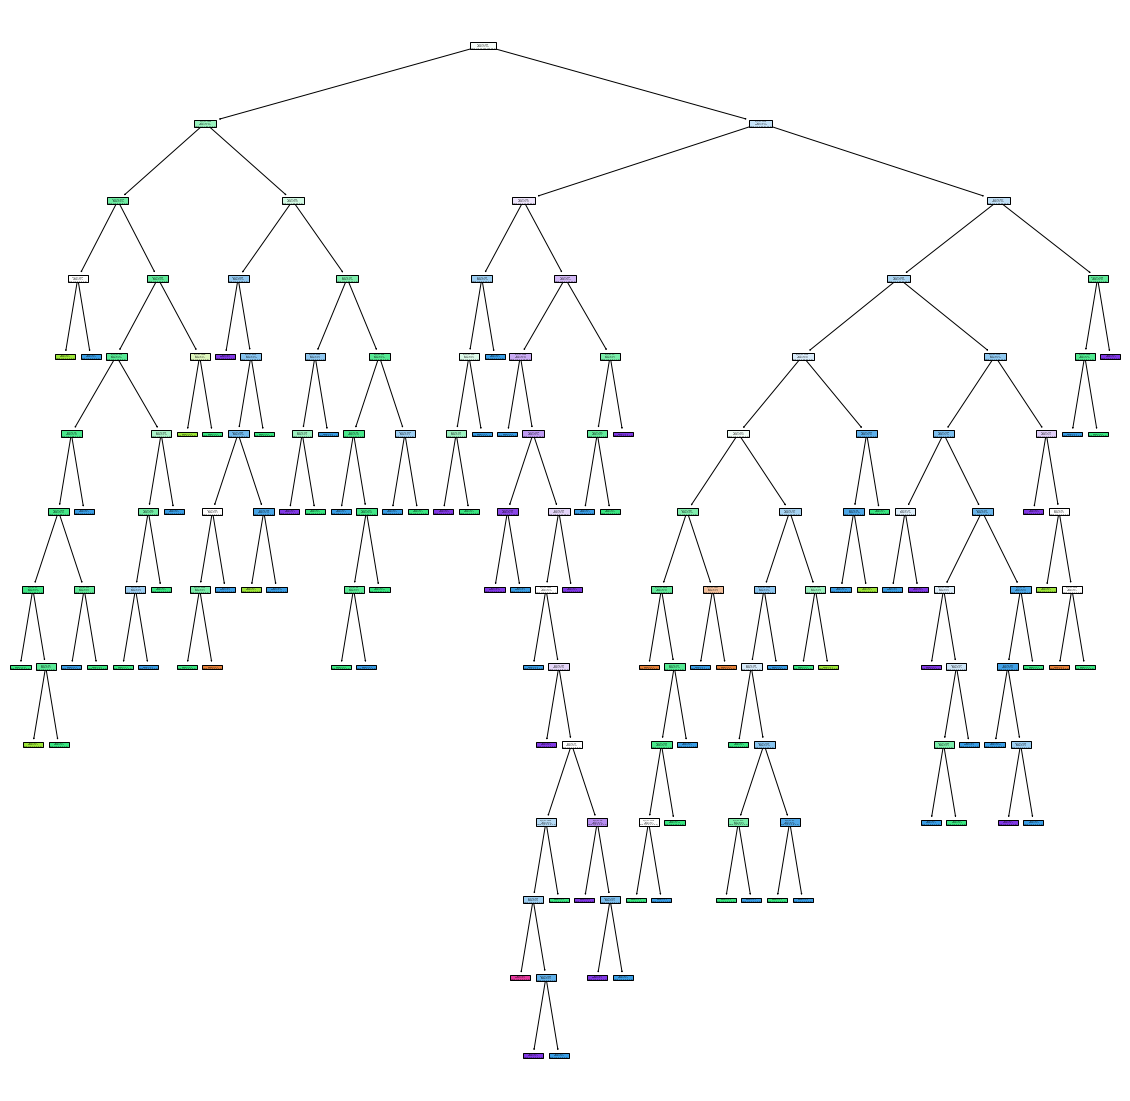

In [11]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model, filled=True)

In [12]:
df = data.head(500)

In [13]:
x1 = df.drop(columns='quality')

In [14]:
y1 = df.quality

In [15]:
dt_model1 = DecisionTreeClassifier()
dt_model1.fit(x1,y1)

DecisionTreeClassifier()

[Text(490.7923188729875, 1057.0, 'alcohol <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]\nclass = 5'),
 Text(304.080053667263, 996.6, 'total sulfur dioxide <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]\nclass = 5'),
 Text(190.90787119856887, 936.2, 'citric acid <= 0.415\ngini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]\nclass = 5'),
 Text(86.34525939177102, 875.8, 'alcohol <= 9.05\ngini = 0.525\nsamples = 131\nvalue = [0, 8, 81, 39, 3, 0]\nclass = 5'),
 Text(31.942754919499105, 815.4000000000001, 'sulphates <= 0.54\ngini = 0.403\nsamples = 12\nvalue = [0, 2, 1, 9, 0, 0]\nclass = 6'),
 Text(23.957066189624328, 755.0, 'total sulfur dioxide <= 26.5\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1, 0, 0, 0]\nclass = 4'),
 Text(15.971377459749553, 694.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0, 0]\nclass = 5'),
 Text(31.942754919499105, 694.6, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0, 0]\nclass = 4'),
 Text(39.928443649373

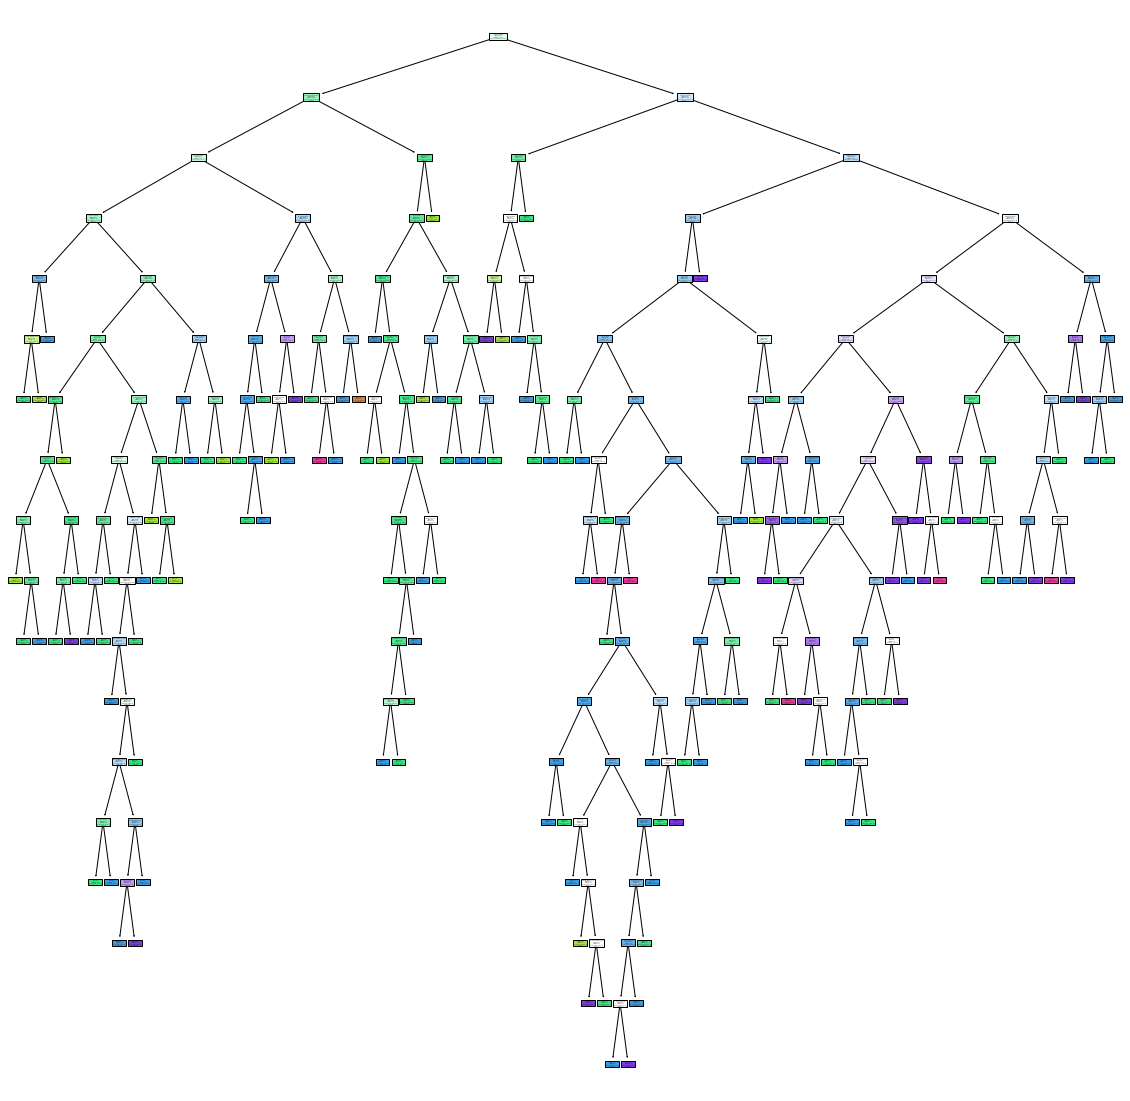

In [16]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model1, filled=True, class_names=[str(i) for i in set(y1)],feature_names=x1.columns)
#plt.savefig('dt_model1')

In [17]:
set(y1)

{3, 4, 5, 6, 7, 8}

In [18]:
dt_model1.predict(x1)

array([5, 5, 5, 6, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 5, 7, 5, 4, 6, 6, 5,
       5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 7, 4, 5, 5, 4, 6, 5,
       5, 4, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 5, 5, 5,
       5, 5, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5, 4, 5, 5, 5, 5, 6, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 4, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 7, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 4, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 4, 6, 5, 5, 5, 5, 4, 6, 5, 4, 6, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6,
       7, 4, 7, 5, 5, 5, 6, 7, 7, 5, 5, 7, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 4, 6, 6, 5, 6, 5, 7, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6,
       6, 7, 7, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 4, 5, 5,
       5, 7, 4, 8, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6, 8, 7, 6, 7, 5, 7, 5, 5,
       6, 6, 7, 5, 7, 5, 6, 6, 6, 5, 5, 5, 5, 5, 6,

In [19]:
dt_model1.score(x1,y1)

1.0

In [20]:
dt_model1.score(x_test,y_test)

0.599687255668491

In [21]:
path = dt_model1.cost_complexity_pruning_path(x1,y1)
ccp_alpha = path.ccp_alphas
ccp_alpha

array([0.        , 0.00166667, 0.00175   , 0.00181818, 0.00184615,
       0.00186667, 0.00188235, 0.00192308, 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.002     , 0.002     ,
       0.002     , 0.002     , 0.002     , 0.00203333, 0.00247552,
       0.00261111, 0.00262769, 0.00266667, 0.00266667, 0.00266667,
       0.00266667, 0.00266667, 0.00266667, 0.00266667, 0.00266667,
       0.00272222, 0.003     , 0.003     , 0.003     , 0.003     ,
       0.00304762, 0.00305051, 0.00308418, 0.00325   , 0.00328205,
       0.00333333, 0.00333333, 0.00334032, 0.00336606, 0.00342857,
       0.00343316, 0.0035    , 0.0035    , 0.0036    , 0.00363636,
       0.00373809, 0.0038    , 0.0038237 , 0.004     , 0.00404444,
       0.00428571, 0.00437662, 0.00462338, 0.00465709, 0.00466667,
       0.0048    , 0.00495726, 0.00504242, 0.00508235, 0.00509091,
       0.00510606, 0.00516667, 0.00568485, 0.00589394, 0.00656364,
       0.00671079, 0.0067591 , 0.00688352, 0.00688889, 0.007  

In [22]:
dt_model2 = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)

In [23]:
dt_model2

[DecisionTreeClassifier(),
 DecisionTreeClassifier(ccp_alpha=0.0016666666666666668),
 DecisionTreeClassifier(ccp_alpha=0.00175),
 DecisionTreeClassifier(ccp_alpha=0.0018181818181818184),
 DecisionTreeClassifier(ccp_alpha=0.0018461538461538455),
 DecisionTreeClassifier(ccp_alpha=0.001866666666666667),
 DecisionTreeClassifier(ccp_alpha=0.001882352941176471),
 DecisionTreeClassifier(ccp_alpha=0.0019230769230769243),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002),
 DecisionTreeClassifier(ccp_alpha=0.002033333333333334),
 DecisionTreeClassifier(ccp_alpha=0.0024755244755244737),
 DecisionTreeClassifier(ccp_alpha=0.002611111111

Text(0, 0.5, 'score')

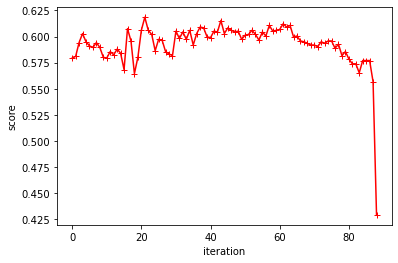

In [24]:
dt_model2 = []
score = []
for ccp in ccp_alpha:
    dt_m = DecisionTreeClassifier(ccp_alpha=ccp)
    dt_m.fit(x1,y1)
    dt_model2.append(dt_m)
    score.append(dt_m.score(x_test,y_test))
    
    
plt.plot(score, 'r-+')
plt.xlabel('iteration')
plt.ylabel('score')

In [25]:
train_score = [i.score(x1,y1) for i in dt_model2]
train_score

[1.0,
 1.0,
 0.996,
 0.996,
 0.994,
 0.992,
 0.988,
 0.986,
 0.964,
 0.964,
 0.962,
 0.962,
 0.962,
 0.96,
 0.962,
 0.966,
 0.962,
 0.962,
 0.962,
 0.958,
 0.952,
 0.946,
 0.932,
 0.93,
 0.934,
 0.93,
 0.934,
 0.93,
 0.93,
 0.93,
 0.928,
 0.92,
 0.914,
 0.92,
 0.916,
 0.918,
 0.912,
 0.908,
 0.906,
 0.906,
 0.898,
 0.902,
 0.896,
 0.898,
 0.888,
 0.888,
 0.884,
 0.884,
 0.882,
 0.88,
 0.87,
 0.87,
 0.864,
 0.858,
 0.854,
 0.856,
 0.852,
 0.838,
 0.824,
 0.828,
 0.814,
 0.81,
 0.804,
 0.802,
 0.794,
 0.79,
 0.786,
 0.784,
 0.78,
 0.776,
 0.776,
 0.772,
 0.768,
 0.762,
 0.758,
 0.742,
 0.728,
 0.718,
 0.698,
 0.69,
 0.682,
 0.676,
 0.676,
 0.636,
 0.596,
 0.596,
 0.596,
 0.558,
 0.478]

In [26]:
test_score = [i.score(x_test,y_test) for i in dt_model2]
test_score

[0.5793588741204065,
 0.5809225957779516,
 0.5942142298670836,
 0.602814698983581,
 0.5949960906958561,
 0.5910867865519938,
 0.5895230648944488,
 0.5942142298670836,
 0.5895230648944488,
 0.5801407349491791,
 0.5793588741204065,
 0.5856137607505864,
 0.5824863174354965,
 0.5879593432369038,
 0.5840500390930414,
 0.5684128225175918,
 0.6075058639562158,
 0.5957779515246286,
 0.5645035183737295,
 0.5801407349491791,
 0.6059421422986708,
 0.6184519155590305,
 0.6059421422986708,
 0.6020328381548085,
 0.5863956215793589,
 0.5973416731821736,
 0.596559812353401,
 0.5856137607505864,
 0.5832681782642689,
 0.581704456606724,
 0.6051602814698983,
 0.5981235340109461,
 0.6043784206411259,
 0.5973416731821736,
 0.6059421422986708,
 0.5918686473807663,
 0.602814698983581,
 0.6090695856137608,
 0.6082877247849883,
 0.599687255668491,
 0.5989053948397185,
 0.6051602814698983,
 0.6043784206411259,
 0.6153244722439406,
 0.602814698983581,
 0.6082877247849883,
 0.6059421422986708,
 0.6043784206411259

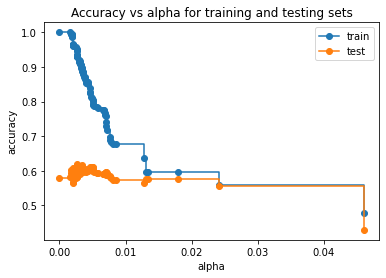

In [27]:
fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alpha, train_score, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alpha, test_score, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

In [28]:
dt_model_ccp = DecisionTreeClassifier(random_state=0, ccp_alpha=.014)
dt_model_ccp.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.014, random_state=0)

[Text(558.0, 906.0, 'X[10] <= 9.85\ngini = 0.624\nsamples = 500\nvalue = [1, 16, 239, 184, 52, 8]'),
 Text(279.0, 543.6, 'X[6] <= 62.5\ngini = 0.504\nsamples = 259\nvalue = [1, 12, 167, 72, 6, 1]'),
 Text(139.5, 181.19999999999993, 'gini = 0.576\nsamples = 169\nvalue = [1, 9, 91, 61, 6, 1]'),
 Text(418.5, 181.19999999999993, 'gini = 0.271\nsamples = 90\nvalue = [0, 3, 76, 11, 0, 0]'),
 Text(837.0, 543.6, 'X[9] <= 0.545\ngini = 0.657\nsamples = 241\nvalue = [0, 4, 72, 112, 46, 7]'),
 Text(697.5, 181.19999999999993, 'gini = 0.408\nsamples = 32\nvalue = [0, 2, 24, 5, 1, 0]'),
 Text(976.5, 181.19999999999993, 'gini = 0.638\nsamples = 209\nvalue = [0, 2, 48, 107, 45, 7]')]

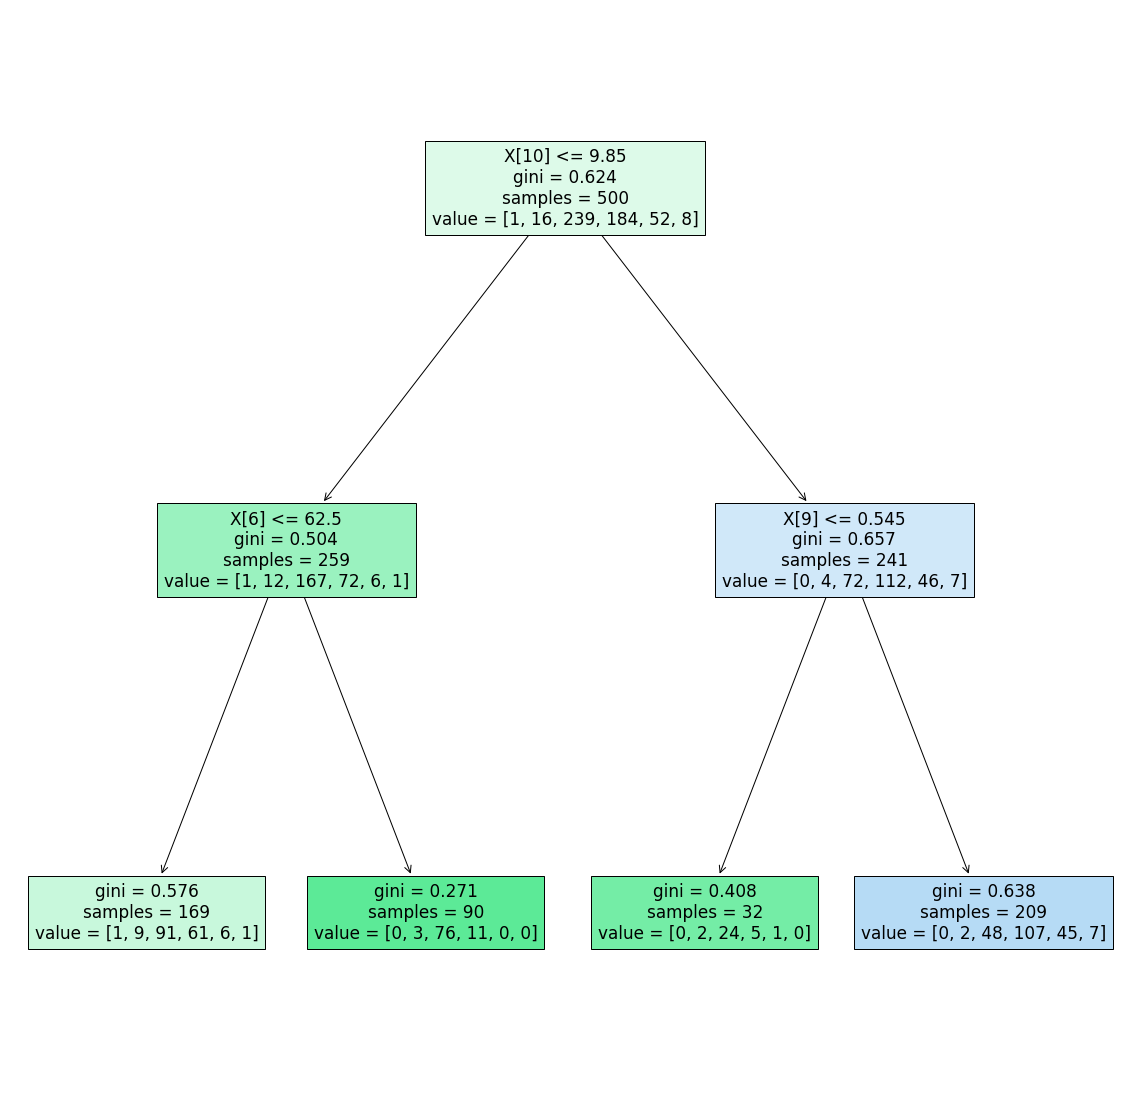

In [29]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt_model_ccp,filled=True)

In [30]:
dt_model_ccp.score(x1,y1)

0.596

In [31]:
dt_model_ccp.score(x_test,y_test)

0.5770132916340891

In [32]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [33]:
grid_pram = {
    'criterion':['gini','entropy'],
    'splitter':['best','random'],
    'max_depth':range(2,40,11),
    'min_samples_split':range(2,10,1),
    'min_samples_leaf':range(1,10,1),
    'ccp_alpha':np.random.rand(20)
            }

In [34]:
grid_ccp = GridSearchCV(estimator=dt_model_ccp,param_grid=grid_pram, cv=5, n_jobs=-1)

In [35]:
grid_ccp.fit(x1,y1)

C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(ccp_alpha=0.014, random_state=0),
             n_jobs=-1,
             param_grid={'ccp_alpha': array([0.63605254, 0.87812372, 0.9301685 , 0.84485913, 0.3971144 ,
       0.97081313, 0.9222453 , 0.98757644, 0.57775797, 0.50137461,
       0.24154369, 0.59208811, 0.40209344, 0.33833624, 0.50321899,
       0.72094809, 0.93097279, 0.76022796, 0.35808882, 0.92194139]),
                         'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 40, 11),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10),
                         'splitter': ['best', 'random']})

In [36]:
grid_ccp.best_params_

{'ccp_alpha': 0.6360525358991865,
 'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [37]:
dt_cpp_new = DecisionTreeClassifier(criterion='entropy',max_depth=13,min_samples_leaf=1,ccp_alpha= 0.010318637494705185,
                                    min_samples_split=9,splitter='random')

In [38]:
dt_cpp_new.fit(x1,y1)

DecisionTreeClassifier(ccp_alpha=0.010318637494705185, criterion='entropy',
                       max_depth=13, min_samples_split=9, splitter='random')

In [39]:
dt_cpp_new.score(x1,y1)

0.74

In [40]:
dt_cpp_new.score(x_test,y_test)

0.5770132916340891

In [41]:
pred = dt_cpp_new.predict(x_train)

In [42]:
confusion_matrix(y_train,pred)

array([[  0,   1,   3,   1,   0,   0],
       [  0,   3,   4,   3,   0,   0],
       [  0,   3, 103,  24,   2,   0],
       [  0,   1,  62,  54,   8,   0],
       [  0,   0,  15,  20,  11,   0],
       [  0,   0,   1,   1,   0,   0]], dtype=int64)

In [43]:
from sklearn.ensemble import BaggingClassifier

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [45]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(), n_estimators=10)

In [46]:
bag_dt.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [47]:
bag_dt.predict(x_test)

array([5, 5, 7, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 7, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 7, 7, 6, 6, 6, 6, 6, 7, 5, 7,
       6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 7, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       6, 5, 8, 5, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 7, 6, 5,
       6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 8, 6, 5, 5, 6, 7, 5, 6,
       6, 6, 5, 5, 6, 7, 5, 6, 7, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 5, 6,
       6, 7, 7, 5, 5, 6, 5, 6, 7, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 7, 6, 5, 6, 6, 7, 6, 6, 5, 5, 6, 5, 5, 7, 6, 6, 7, 7, 6, 5, 6,
       5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7, 6, 6, 5, 6,
       5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 6, 7, 6, 6, 6, 5, 7, 5, 6, 6, 5,
       5, 5, 7, 6, 5, 5, 6, 6, 6, 6, 6, 5, 5, 5, 6,

In [48]:
bag_dt.base_estimator_

DecisionTreeClassifier()

In [49]:
bag_dt.classes_

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [50]:
bag_dt.estimator_params

()

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
bag_knn = BaggingClassifier(KNeighborsClassifier(6),n_estimators=10)

In [53]:
bag_knn.fit(x_train,y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=6))

In [54]:
bag_knn.predict(x_test)

array([5, 6, 7, 6, 6, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 7, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 5,
       6, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 5, 5, 5,
       6, 5, 7, 7, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 7, 5, 6, 6, 6, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 7, 5, 7, 7, 6, 5, 7, 6, 5, 7, 5, 5, 5, 5, 6, 5, 5,
       5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 6, 7, 6, 6, 6, 5, 6, 6,
       5, 6, 5, 6, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 7, 6, 7, 7, 6,
       5, 7, 7, 5, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5,
       5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 7, 6, 6, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 5, 6, 5, 6, 6, 7, 6, 6, 7, 6, 6, 5, 5, 5, 5,
       5, 5, 6, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 6,

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rf = RandomForestClassifier(n_estimators=5)

In [57]:
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=5)

In [58]:
rf.score(x_test,y_test)

0.65

In [59]:
bag_dt.score(x_test,y_test)

0.645

In [60]:
bag_knn.score(x_test,y_test)

0.5125

In [61]:
rf.estimators_

[DecisionTreeClassifier(max_features='auto', random_state=700412602),
 DecisionTreeClassifier(max_features='auto', random_state=2013070809),
 DecisionTreeClassifier(max_features='auto', random_state=1612290454),
 DecisionTreeClassifier(max_features='auto', random_state=165548060),
 DecisionTreeClassifier(max_features='auto', random_state=1566396430)]

[Text(593.5922978482099, 1057.0, 'X[9] <= 0.585\ngini = 0.646\nsamples = 758\nvalue = [11, 39, 507, 474, 158, 10]'),
 Text(250.59030161844044, 996.6, 'X[10] <= 11.05\ngini = 0.54\nsamples = 292\nvalue = [8, 20, 282, 130, 20, 0]'),
 Text(176.06829328102012, 936.2, 'X[6] <= 98.5\ngini = 0.446\nsamples = 236\nvalue = [8, 16, 258, 81, 1, 0]'),
 Text(126.6378126532614, 875.8, 'X[1] <= 0.972\ngini = 0.476\nsamples = 204\nvalue = [8, 16, 217, 77, 1, 0]'),
 Text(54.048553212359, 815.4000000000001, 'X[4] <= 0.072\ngini = 0.435\nsamples = 189\nvalue = [2, 12, 212, 71, 1, 0]'),
 Text(26.271701814615007, 755.0, 'X[5] <= 35.0\ngini = 0.233\nsamples = 35\nvalue = [0, 4, 54, 4, 0, 0]'),
 Text(21.893084845512508, 694.6, 'X[0] <= 7.25\ngini = 0.21\nsamples = 34\nvalue = [0, 4, 54, 3, 0, 0]'),
 Text(17.514467876410006, 634.2, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 23, 0, 0, 0]'),
 Text(26.271701814615007, 634.2, 'X[3] <= 3.9\ngini = 0.317\nsamples = 23\nvalue = [0, 4, 31, 3, 0, 0]'),
 Text(21.8930848

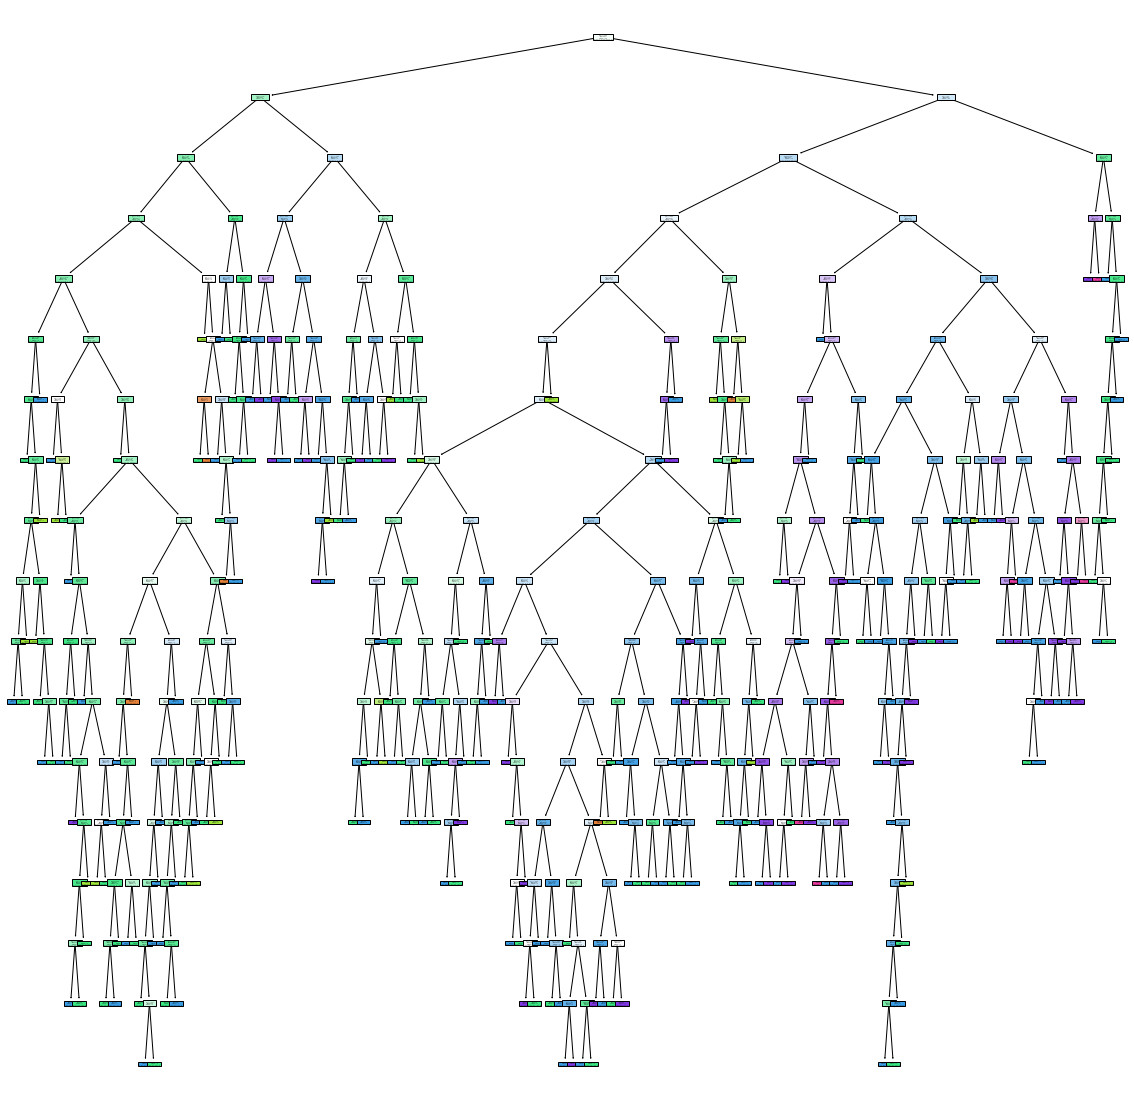

In [62]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[0],filled=True)

[Text(586.9459002006018, 1055.2235294117647, 'X[9] <= 0.585\ngini = 0.631\nsamples = 746\nvalue = [7, 40, 544, 464, 133, 11]'),
 Text(226.14531093279842, 991.2705882352941, 'X[10] <= 10.05\ngini = 0.51\nsamples = 293\nvalue = [5, 23, 306, 127, 14, 0]'),
 Text(127.74674022066199, 927.3176470588236, 'X[1] <= 0.593\ngini = 0.355\nsamples = 180\nvalue = [2, 15, 230, 43, 2, 0]'),
 Text(81.71313941825477, 863.364705882353, 'X[10] <= 9.75\ngini = 0.443\nsamples = 79\nvalue = [0, 8, 93, 29, 1, 0]'),
 Text(47.01303911735206, 799.4117647058824, 'X[6] <= 33.5\ngini = 0.363\nsamples = 68\nvalue = [0, 4, 87, 20, 1, 0]'),
 Text(17.90972918756269, 735.4588235294118, 'X[1] <= 0.555\ngini = 0.166\nsamples = 21\nvalue = [0, 1, 31, 1, 1, 0]'),
 Text(8.954864593781345, 671.5058823529412, 'X[5] <= 8.5\ngini = 0.069\nsamples = 17\nvalue = [0, 1, 27, 0, 0, 0]'),
 Text(4.477432296890672, 607.5529411764707, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 16, 0, 0, 0]'),
 Text(13.432296890672017, 607.5529411764707, 'X

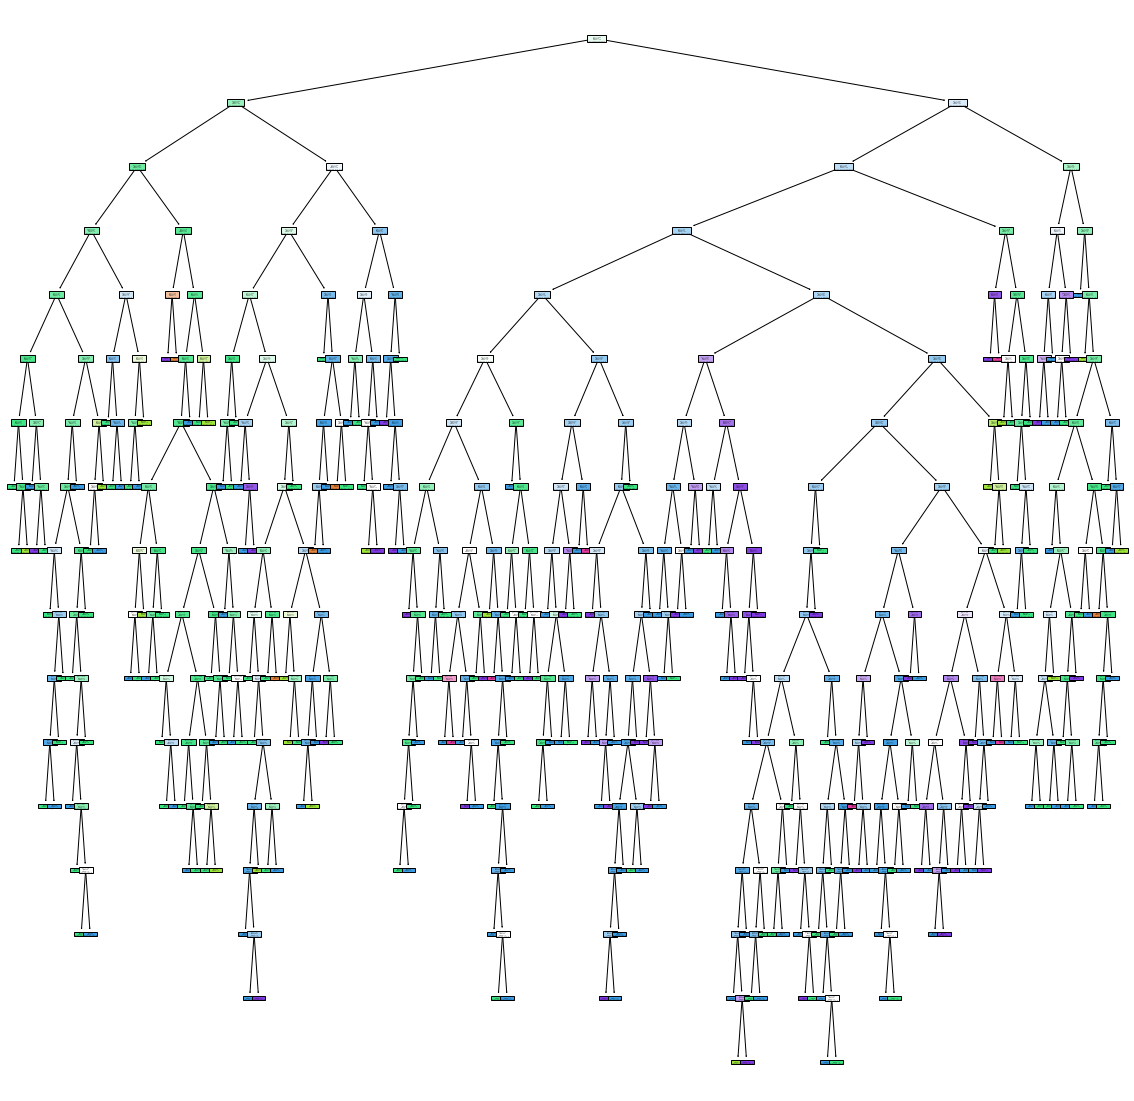

In [63]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1],filled=True)

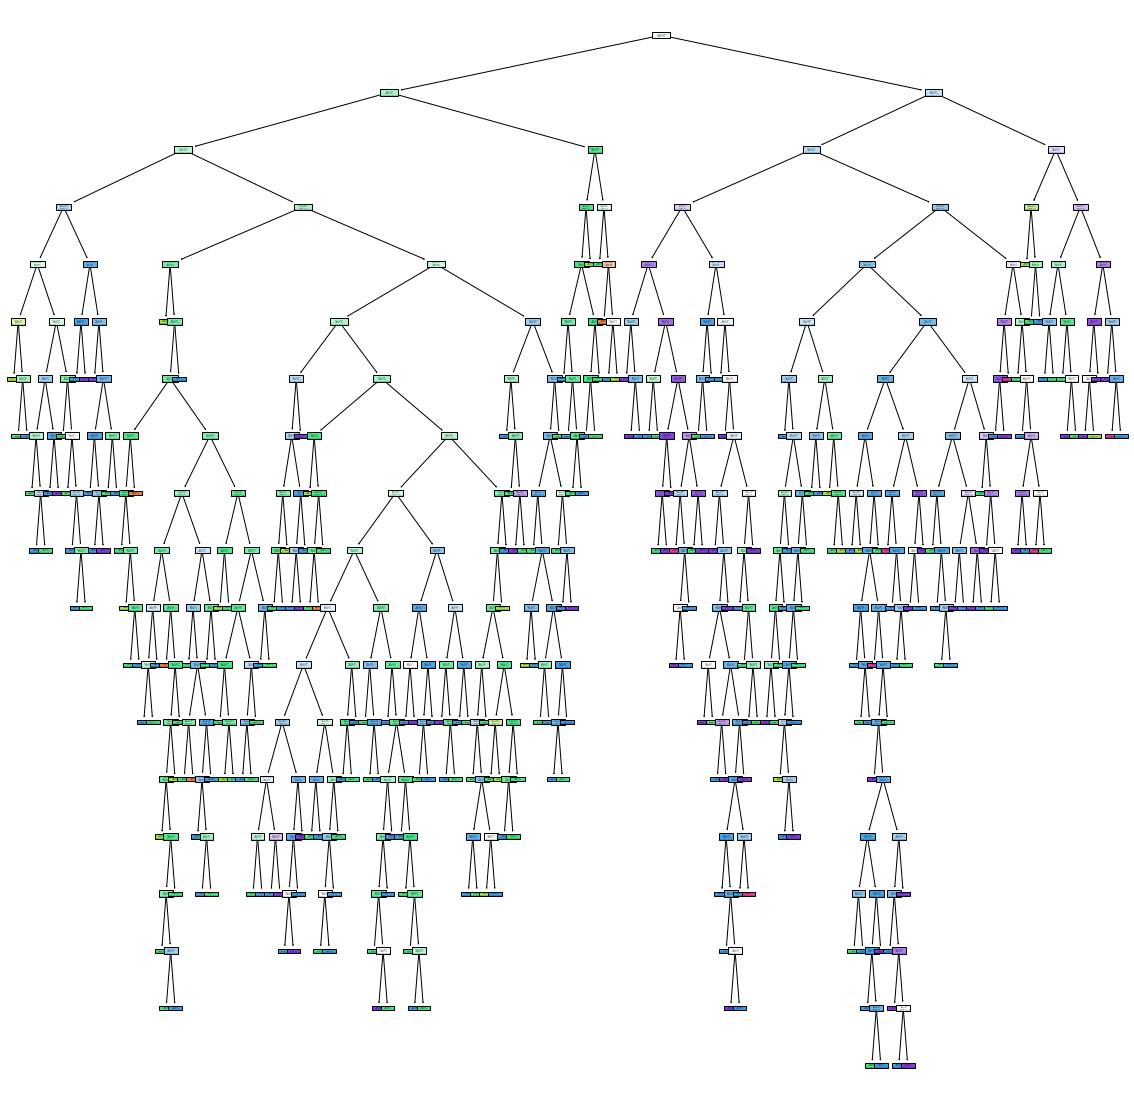

In [64]:
plt.figure(figsize=(20,20))
for i in range(len(rf.estimators_)):
    tree.plot_tree(rf.estimators_[i],filled=True)

In [65]:
grid_pram = {
    "n_estimators" : [5,10,50,100,120,150],
    "criterion": ['gini','entropy'],
    'max_depth' : range(10),
    'min_samples_leaf': range(10)
}

In [66]:
rf = RandomForestClassifier(n_estimators=5)

In [67]:
grid_search_rf = GridSearchCV(param_grid=grid_pram, cv=10, verbose=1, n_jobs=-1,estimator = rf)

In [68]:
grid_search_rf.fit(x_train,y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan ... 0.63555322 0.63053922 0.62468487]
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 10),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 50, 100, 120, 150]},
             verbose=1)

In [69]:
grid_search_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 1,
 'n_estimators': 150}

In [70]:
rf_new = RandomForestClassifier(criterion='entropy',max_depth=9,min_samples_leaf=1,n_estimators=150)

In [71]:
rf_new.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=150)

In [72]:
rf_new.score(x_test,y_test)

0.6725

[Text(490.2384868421052, 1032.8400000000001, 'X[1] <= 0.365\nentropy = 1.702\nsamples = 753\nvalue = [7, 31, 512, 468, 168, 13]'),
 Text(198.5427631578947, 924.1200000000001, 'X[6] <= 35.5\nentropy = 1.68\nsamples = 149\nvalue = [0, 3, 31, 93, 103, 8]'),
 Text(111.96710526315789, 815.4000000000001, 'X[4] <= 0.075\nentropy = 1.473\nsamples = 95\nvalue = [0, 0, 12, 58, 85, 6]'),
 Text(61.18421052631579, 706.6800000000001, 'X[1] <= 0.325\nentropy = 1.283\nsamples = 52\nvalue = [0, 0, 1, 29, 57, 6]'),
 Text(29.368421052631575, 597.96, 'X[1] <= 0.265\nentropy = 1.023\nsamples = 36\nvalue = [0, 0, 1, 22, 43, 0]'),
 Text(19.57894736842105, 489.24, 'X[6] <= 24.5\nentropy = 0.949\nsamples = 13\nvalue = [0, 0, 0, 12, 7, 0]'),
 Text(14.684210526315788, 380.5200000000001, 'X[10] <= 10.95\nentropy = 1.0\nsamples = 10\nvalue = [0, 0, 0, 7, 7, 0]'),
 Text(9.789473684210526, 271.80000000000007, 'X[0] <= 11.7\nentropy = 0.544\nsamples = 5\nvalue = [0, 0, 0, 7, 1, 0]'),
 Text(4.894736842105263, 163.0800

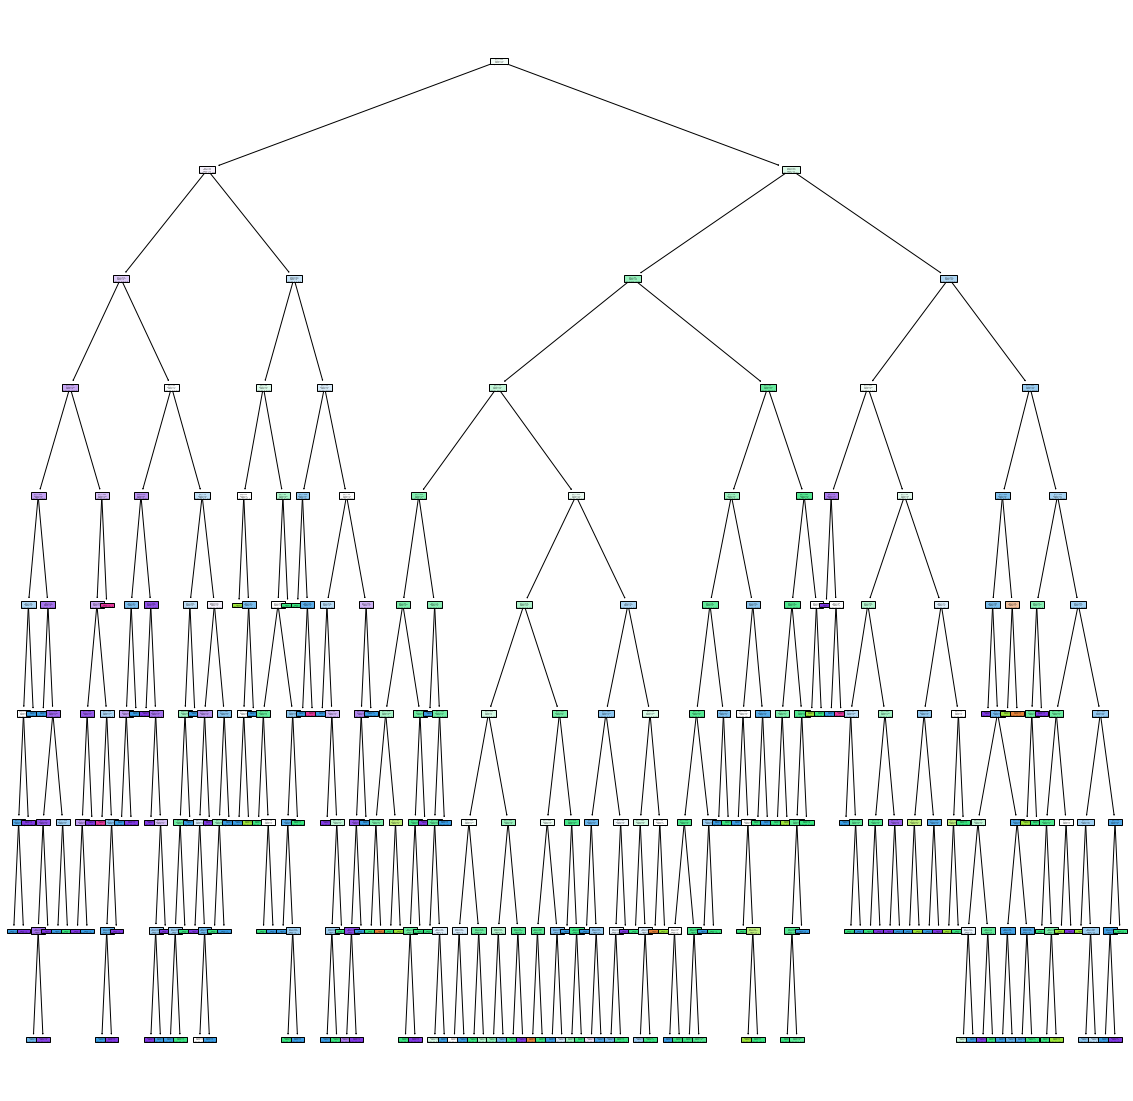

In [73]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf_new.estimators_[0],filled=True)

In [77]:
knn = KNeighborsClassifier()

In [78]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [79]:
knn.score(x_test,y_test)

0.47

In [124]:
param = {
    'n_neighbors':[3,5,7,9,12,13,15,17,21,25,29],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size' :[10,15,20,25,30,35,45,50],
    'p':[1,2],
    'weights':['uniform','distance']
}

In [125]:
grid_cv = GridSearchCV(knn,param_grid=param)

In [126]:
grid_cv.fit(x_train,y_train)

C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(leaf_size=12, n_neighbors=12, p=1,
                                            weights='distance'),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 15, 20, 25, 30, 35, 45, 50],
                         'n_neighbors': [3, 5, 7, 9, 12, 13, 15, 17, 21, 25,
                                         29],
                         'p': [1, 2], 'weights': ['uniform', 'distance']})

In [127]:
grid_cv.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_neighbors': 21,
 'p': 1,
 'weights': 'distance'}

In [128]:
knn = KNeighborsClassifier(n_neighbors=21,algorithm='auto',leaf_size= 12,p=1,weights='distance')

In [129]:
knn.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=12, n_neighbors=21, p=1, weights='distance')

In [130]:
knn.score(x_test,y_test)

0.5261923377638781

In [131]:
pickle.dump(knn,open('knn.pkl','wb'))

In [135]:
knn.predict([x_test.iloc[0]])

array([5], dtype=int64)

In [133]:
x_test.iloc[0]

fixed acidity            8.3000
volatile acidity         0.6000
citric acid              0.1300
residual sugar           2.6000
chlorides                0.0850
free sulfur dioxide      6.0000
total sulfur dioxide    24.0000
density                  0.9984
pH                       3.3100
sulphates                0.5900
alcohol                  9.2000
Name: 605, dtype: float64

In [137]:
svc = SVC()

In [138]:
svc.fit(x_train,y_train)

SVC()

In [139]:
svc.score(x_test,y_test)

0.4870992963252541

In [ ]:
param_svc = {
    'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
    'C':[.1,.4,.6,1,2,3,100,200,500],
    'gamma':[0.001,.1,.4,.004,.003]
}
svm_grid = GridSearchCV(svc, param_grid=param_svc, verbose=3)
svm_grid.fit(x_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV 1/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 2/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s


C:\Users\fazlu\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


[CV 3/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 4/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 5/5] END ..............C=0.1, gamma=0.001, kernel=linear; total time=   0.0s
[CV 1/5] END ................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 2/5] END ................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 3/5] END ................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 4/5] END ................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 5/5] END ................C=0.1, gamma=0.001, kernel=poly; total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=0.1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...............

In [ ]:
svm_grid.best_params_

In [143]:
svc1 = SVC(kernel='linear',)
svc1.fit(x_train,y_train)

SVC(kernel='linear')

In [144]:
svc1.score(x_test,y_test)

0.5809225957779516

In [2]:
admision_data = pd.read_csv('Admission_Prediction.csv')
admision_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332.0,108.0,5.0,4.5,4.0,9.02,1,0.87
496,497,337.0,117.0,5.0,5.0,5.0,9.87,1,0.96
497,498,330.0,120.0,5.0,4.5,5.0,9.56,1,0.93
498,499,312.0,103.0,4.0,4.0,5.0,8.43,0,0.73


In [18]:
x = admision_data.drop(['Serial No.','Chance of Admit'], axis=1)

In [19]:
y = admision_data['Chance of Admit']

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=30,test_size=.2)

In [21]:
from sklearn.svm import SVR

In [22]:
svr = SVR()

In [23]:
admision_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [14]:
admision_data['TOEFL Score'] = admision_data['TOEFL Score'].fillna(admision_data['TOEFL Score'].mean())

In [12]:
admision_data['GRE Score'] = admision_data['GRE Score'].fillna(admision_data['GRE Score'].mean())

In [15]:
admision_data['University Rating'] = admision_data['University Rating'].fillna(admision_data['University Rating'].mean())

In [24]:
svr.fit(x_train,y_train)

SVR()

In [25]:
svr.score(x_test,y_test)

0.6774861142346674

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test, svr.predict(x_test))

0.6774861142346674

In [27]:
svr.predict([x.iloc[0]])

array([0.89252382])

In [28]:
y[0]

0.92

In [29]:
# Stacking

In [46]:
train,val_train,test,val_test = train_test_split(x,y,test_size=0.5,random_state=30)

In [47]:
x_test,x_train,y_test,y_train = train_test_split(train,test,test_size=0.20,random_state=30)

In [48]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [49]:
knn.score(x_test,y_test)

0.48200312989045385

In [50]:
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [51]:
svc.score(x_test,y_test)

0.48826291079812206

In [52]:
prediction_knn = knn.predict(val_train)
prediction_svc = svc.predict(val_train)

In [53]:
prediction_knn

array([5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6,
       5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 7, 5, 6, 6, 5,
       5, 5, 5, 7, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5,
       5, 6, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 6, 5, 5, 7, 6, 6, 6, 5, 7, 5,
       5, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 7, 5, 5, 7, 6, 6, 5, 5, 5,
       6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6,
       5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 6, 7, 5,
       5, 5, 6, 5, 6, 6, 5, 6, 7, 6, 6, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 7,
       6, 6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 5,
       3, 5, 5, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,

In [55]:
input3 = np.column_stack((prediction_knn,prediction_svc))

In [57]:
pd.DataFrame(input3)

,0,1
0,5,6
1,5,6
2,6,6
3,6,6
4,5,6
...,...,...
795,6,6
796,6,6
797,5,6
798,5,6


In [56]:
output = val_test

In [58]:
pd.DataFrame(output)

,quality
1147,7
659,4
871,5
1333,5
1411,6
...,...
1073,6
200,7
942,7
1106,6


In [59]:
rf = RandomForestClassifier()

In [60]:
rf.fit(input3,output)

RandomForestClassifier()

In [62]:
knn_output = knn.predict(x_test)
svc_output = svc.predict(x_test)

In [66]:
output_stack1 = np.column_stack((knn_output,svc_output))

In [67]:
rf.predict(output_stack1)

array([5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 6, 5,
       5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5,
       5, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 6, 5, 6,
       5, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 5, 5, 5,
       5, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6,
       5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 6, 5, 6,
       5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 5, 5, 6, 5, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6,

In [68]:
rf.score(output_stack1,y_test)

0.5007824726134585

In [43]:
dt_model.predict(x_test)

array([5, 6, 5, ..., 7, 7, 5], dtype=int64)

In [44]:
dt_model.score(x_test,y_test)

0.5136825645035183

In [45]:
dt_en = DecisionTreeClassifier(criterion="entropy")

In [46]:
dt_en.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
dt_en.score(x_test,y_test)

0.5019546520719312

In [48]:
outfile = open('dt_en_meta.dot','w')
tree.export_graphviz(dt_en,out_file=outfile,feature_names=x.columns)